In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import statistics as sts
import lmfit
from lmfit import Model
from scipy.stats import sem
from scipy.stats import linregress
from matplotlib import markers
import seaborn as sns

# Linear Fit
def line(x, m, b):
    return x * m + b
gmodel = Model(line)
param1 = gmodel.make_params(m = 1, b = 1)
param1['m'].set(min = 0)

colors = {'Pt' : 'tab:blue',
          'Al' : 'tab:orange', 
          'Mo' : 'tab:green',
          'Cr' : 'tab:red'}

# Function
def r_t(s, r_s, l_t, N, W, L):
    return (r_s * s / (N * W + (N-1) * (2 *s + L))) + (2 * r_s * l_t / (N * W + (N-1) * (2 *s + L)))


#Create model and parameters
gmodel5 = Model(r_t)
param5 = gmodel5.make_params()
param5['r_s'].set(value = 1e10, min = 0)
param5['l_t'].set(value = 1, min = 0)
param5['L'].set(value = 3200e-4, vary = False)
param5['W'].set(value = 5e-4, vary = False)
param5['N'].set(value = 60, vary = False)

1.0426e-06
86493.19776828002
6.0571e-05
0.20693320568318083


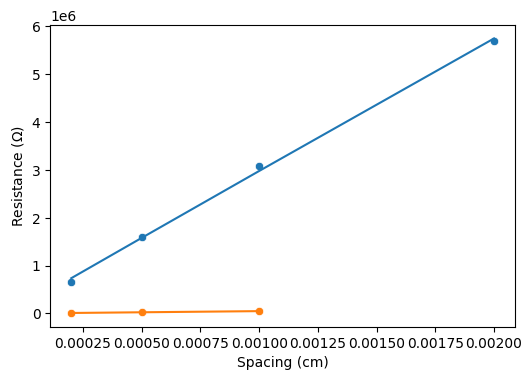

In [10]:
# Setup
col = ['Potential (V)', 'Current (A)', 'Time (s)']
col2 = ['Spacing (cm)', 'Resistance ($\Omega$)', 'Structure']
spacing = [2e-4, 5e-4, 10e-4, 20e-4]

# 0G_20
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\0G_20'
files = [os.path.join(path, i) for i in os.listdir(path)  if 'README.txt' != i]
sample = path[-5:]
resistance = pd.DataFrame(columns = col2)
# 0G_13
path_0G_13 = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\LCR\0G_13'
files2 = [os.path.join(path_0G_13, i) for i in os.listdir(path_0G_13)  if 'README.txt' != i]
files2.sort(key = (lambda x: x[-6:-4])) # sort files by last part of string
sample2 = path_0G_13[-5:]
resistance_0G_13 = pd.DataFrame(columns = col2)

#fig, ax = plt.subplots(dpi = 100, facecolor = 'white')
n = 0
for i in files:
    df = pd.read_csv(i, names = col, sep = ';', skiprows = 1)
    r = gmodel.fit(df[col[1]], param1, x = df[col[0]])
    slope = r.best_values['m']
    resistance.loc[n] = [spacing[n], 1/ slope, i[-10:-4]]
    # plt.plot(df[col[0]], df[col[1]])
    # plt.plot(df[col[0]], r.best_fit)
    n += 1

# 0G_13
n = 0
for i in files2:
    df2 = pd.read_csv(i, names = ['DC', 'Idc', 'Vds'], sep = ',', skiprows = 1)
    r2 = gmodel.fit(df2['Idc'], param1, x = df2['Vds'])
    slope2 = r2.best_values['m']
    resistance_0G_13.loc[n] = [spacing[n], 1/ slope2, i[-10:-4]]

    #fig, ax = plt.subplots(dpi = 100, facecolor = 'white')
    # plt.plot(df2['Vds'], df2['Idc'])
    # plt.plot(df2['Vds'], r2.best_fit)
    n += 1

fig, ax = plt.subplots(dpi = 100, facecolor = 'white')
ax = sns.scatterplot(data = resistance, x = col2[0], y = col2[1])
ax2 = sns.scatterplot(data = resistance_0G_13, x = col2[0], y = col2[1])

result = gmodel5.fit(resistance[col2[1]], param5, s = resistance[col2[0]])
plt.plot(resistance[col2[0]], result.best_fit)
rc_2 = gmodel5.eval(result.params, s = 0)
rs = result.values['r_s']
sigma = 1/  (rs * 0.18e-4)
print('{:.4e}'.format(sigma))
print(rc_2 / 2)

result2 = gmodel5.fit(resistance_0G_13[col2[1]], param5, s = resistance_0G_13[col2[0]])
plt.plot(resistance_0G_13[col2[0]], result2.best_fit)
rc_2_2 = gmodel5.eval(result2.params, s = 0)
rs2 = result2.values['r_s']
sigma2 = 1/  (rs2 * 0.18e-4)
print('{:.4e}'.format(sigma2))
print(rc_2_2)



,Spacing (cm),Resistance ($\Omega$),Structure
0,0.0002,22202.353334,C4_P01


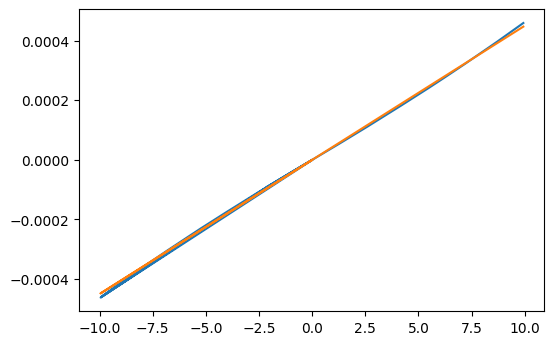

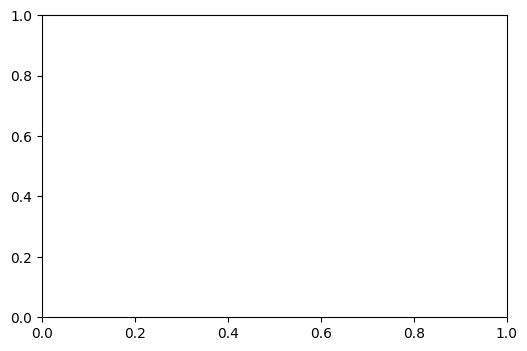

In [22]:
path_0G_13 = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\LCR\0G_13'
files2 = [os.path.join(path_0G_13, i) for i in os.listdir(path_0G_13)  if 'README.txt' != i]
df2 = pd.read_csv(files2[0], names = ['DC', 'Idc', 'Vds'], sep = ',', skiprows = 1)
files2.sort(key = (lambda x: x[-6:-4])) # sort files by last part of string

r2 = gmodel.fit(df2['Idc'], param1, x = df2['Vds'])
slope2 = r2.best_values['m']
resistance_0G_13.loc[0] = [spacing[0], 1/ slope2, files2[0][-10:-4]]

fig, ax = plt.subplots(dpi = 100, facecolor = 'white')
plt.plot(df2['Vds'], df2['Idc'])
plt.plot(df2['Vds'], r2.best_fit)

fig, ax = plt.subplots(dpi = 100, facecolor = 'white')

resistance_0G_13



In [ ]:
#Settings
sns.set_theme(style="ticks")
dpi = 200
s = np.array([2, 5, 10]) *1e-4
r = []

#Load file
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\LCR\0G_18\C1'
files = [os.path.join(path, i) for i in os.listdir(path)]

#Make plot of I-V
fig, ax = plt.subplots(facecolor = 'white', dpi = dpi, ncols = 2, figsize = (15,5))
ax[0].set_ylabel('Current (A)')
ax[0].set_xlabel('Potential (V)')

sns.despine()

n = 0
for i in files:
    df = pd.read_csv(i)
    linear_fit = gmodel.fit(df['Idc'], param1, x = df['Vds'])
    #print(linear_fit.fit_report())
    ax[0].scatter(df['Vds'], df['Idc'], s = 1)
    ax[0].plot(df['Vds'], linear_fit.best_fit, 'k--')
    ax[1].scatter(s[n], 1/linear_fit.values['m'])
    r.append(1/linear_fit.values['m'])
    n += 1


result = gmodel5.fit(r, param5, s = s)
# result = gmodel.fit(r, param1, x = s)
ax[1].plot(s, result.best_fit)
# # print(result.fit_report())
rs = result.values['r_s']
sigma = 1/  (rs * 0.18e-4)
print('{:.4e}'.format(sigma))

rc_2 = gmodel5.eval(result.params, s = 0) # 2 times contact resistance
print(rc_2 / 2)


In [ ]:
c1 = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\LCR\0G_18\C1\C1_P01.txt'
c2 = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\LCR\0G_18\C2\C2_P01.txt'

df1 = pd.read_csv(c1)
df2 = pd.read_csv(c2)

plt.plot(df1['Vds'], df1['Idc'])
plt.plot(df2['Vds'], df2['Idc'])

In [ ]:
# P05 to P08

#Settings
sns.set_theme(style="ticks")
dpi = 200
s = np.array([2, 5, 10]) *1e-4
r = []
param5['L'].set(value = 5000e-4, vary = False)
param5['W'].set(value = 5e-4, vary = False)
param5['N'].set(value = 260, vary = False)


#Load file
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\LCR\0G_18\Large'
files = [os.path.join(path, i) for i in os.listdir(path)]

#Make plot of I-V
fig, ax = plt.subplots(facecolor = 'white', dpi = dpi, ncols = 2, figsize = (15,5))
ax[0].set_ylabel('Current (A)')
ax[0].set_xlabel('Potential (V)')

sns.despine()

n = 0
for i in files:
    df = pd.read_csv(i)
    linear_fit = gmodel.fit(df['Idc'], param1, x = df['Vds'])
    #print(linear_fit.fit_report())
    ax[0].scatter(df['Vds'], df['Idc'], s = 1)
    ax[0].plot(df['Vds'], linear_fit.best_fit, 'k--')
    ax[1].scatter(s[n], 1/linear_fit.values['m'])
    r.append(1/linear_fit.values['m'])
    n += 1


result = gmodel5.fit(r, param5, s = s)
# # result = gmodel.fit(r, param1, x = s)
ax[1].plot(s, result.best_fit)
# # # print(result.fit_report())
rs = result.values['r_s']
sigma = 1/  (rs * 0.18e-4)
print('{:.4e}'.format(sigma))

rc_2 = gmodel5.eval(result.params, s = 0) # 2 times contact resistance
print(rc_2 / 2)

In [ ]:
# Pt 1 vs Pt 2 0G_13 vs 0G_18

#Settings
fig, ax = plt.subplots(facecolor = 'white', dpi = 200, ncols = 2, figsize = (18,8))
ax[0].set_xticks([0.5, 2.5], ['Pt1', 'Pt2'])
fig.tight_layout(pad=8.0)
sns.despine()

# Fit params
param5 = gmodel5.make_params()
param5['r_s'].set(value = 1e10, min = 0)
param5['l_t'].set(value = 1, min = 0)
param5['L'].set(value = 3200e-4, vary = False)
param5['W'].set(value = 5e-4, vary = False)
param5['N'].set(value = 60, vary = False)

# Files
_0G_13 = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\LCR\0G_13\Contact resistance fit'
_0G_18 = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\LCR\0G_18\C1'
files1 = [os.path.join(_0G_13, i) for i in os.listdir(_0G_13)]
files2 = [os.path.join(_0G_18, i) for i in os.listdir(_0G_18)]

# Data
# 0G_13
s = np.array([2, 5, 10]) *1e-4
r_tot = []
for i in files1:
    df1 = pd.read_csv(i)
    #ax[0].plot(df1['Vds'], df1['Idc'], color = 'tab:blue')
    fit_r = gmodel.fit(df1['Idc'], param1, x = df1['Vds'])
    r_tot.append(1 / fit_r.values['m'])
r_spac = gmodel5.fit(r_tot, param5, s = s)
rc = gmodel5.eval(r_spac.params, s = 0) # 2 times contact resistance
l_t = r_spac.best_values['l_t'] # transfer length
r_s = r_spac.best_values['r_s'] # sheet resistance
# rho_c = rc / 2 * l_t * w # Specific contact resistance
sigma = 1 / (r_s * 0.18e-4)
print(rc)

ax[1].scatter(s, r_tot, s = 80)
ax[1].plot(s, r_spac.best_fit, label = 'Pt1')
ax[0].bar([0], height = [rc / 2], color = 'tab:orange')
ax2 = ax[0].twinx()
ax2.bar([1], height = [sigma], color = 'tab:blue')
ax[0].set_ylabel('Contact resistance ($\Omega$/sq)')
ax[1].grid()


# 0G_18
s = np.array([2, 5, 10]) *1e-4
r_tot = []
for i in files2:
    df1 = pd.read_csv(i)
    # ax[0].plot(df1['Vds'], df1['Idc'], color = 'tab:orange')
    fit_r = gmodel.fit(df1['Idc'], param1, x = df1['Vds'])
    r_tot.append(1 / fit_r.values['m'])
r_spac2 = gmodel5.fit(r_tot, param5, s = s)
rc2 = gmodel5.eval(r_spac2.params, s = 0) # 2 times contact resistance
l_t = r_spac2.best_values['l_t'] # transfer length
r_s = r_spac2.best_values['r_s'] # sheet resistance
# rho_c = rc / 2 * l_t * w # Specific contact resistance
sigma = 1 / (r_s * 0.18e-4)
ax[1].scatter(s, r_tot, s = 80)
ax[1].plot(s, r_spac2.best_fit, label = 'Pt2')
ax[0].bar([2], height = [rc2 / 2], color = 'tab:orange')
#ax2 = ax[0].twinx()
ax2.bar([3], height = [sigma], label = '$\sigma$ Conductivity')
ax2.bar([0], color = 'tab:orange', height = 0, label = 'Contact resistance')
ax2.set_ylabel('Conductivity $\sigma$ (S cm$^{-1}$)')
ax[1].legend()
ax2.legend()

ax[1].set_ylabel('Resistance ($\Omega$)')
ax[1].set_xlabel('Spacing (cm)')


# ax[1][1].bar([b], height = [sigma], color = colors[i])



In [ ]:
### TiN
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\LCR\TiN'
files = [os.path.join(path, i) for i in os.listdir(path)]
df = pd.read_csv(files[0])
x, y = df['Vds'], df['Idc']
fit1 = gmodel.fit(y, param1, x = x)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
sns.lineplot(x = x, y = y, label = 'Data')
sns.lineplot(x = x, y = fit1.best_fit, label = 'Fit', linestyle = 'dashed')
print('Resistance = ' + str(1 / fit1.values['m']) + ', r^2 = ' + str(r_value**2) + ' std error = ' + str(std_err))
print(fit1.fit_report())


In [ ]:
slope, intercept, r_value, p_value, std_err = linregress(x, y)
